In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]


In [2]:
epochs = 1
model_name = 'bert-base'

In [3]:
import pandas as pd
import numpy as np
import json

In [4]:
data_path = '/home/Danny/Data-Mining/lab2/kaggle/data/'

In [5]:
json_list = list()
with open(data_path + 'tweets_DM.json' , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [6]:
tweet_list = list()
for json in json_list:
    tweet_id = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    hashtag = ' '.join(hashtags)
    text = json['_source']['tweet']['text']
    text = text + ' ' + hashtag
    tweet_list.append([tweet_id, text])

In [7]:
emotion_df = pd.read_csv(data_path + 'emotion.csv')
emotion_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [8]:
identification_df = pd.read_csv(data_path + 'data_identification.csv')
identification_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [9]:
emoji_dict = {
    "😂": "lolface",
    "😂😂": "lolface",
    "😂😂😂": "lolface",
    "😇": "smile",
    "😀": "smile",
    "🎉": "party",
    "😳": "embarrassed",
    "😔": "sadface",
    "👀": "shifty",
    "🤷": "shrugging",
    "💔": "brokenhearted",
    "👻": "ghost",
    "😍": "heart",
    "🙄": "disdain",
    "💖": "heart",
    "✌": "victory",
    "🎶": "music",
    "😱": "shock",
    "😃": "smile",
    "😒": "unsatisfied",
    "👊": "brofist",
    "😄": "smile",
    "🌞": "smile",
    "🙌": "celebration",
    "😁": "smile",
    "🤗": "hugging",
    "🤣": "rofl",
    "🌈": "gaypride",
    "😉": "winking",
    "💞": "heart",
    "🙃": "irony",
    "😜": "winking",
    "😭": "bawling",
    "🤔": "thinker",
    "😎": "cool",
    "💛": "heart",
    "💚": "heart",
    "💃": "fun",
    "💗": "heart",
    "😬": "awkward",
    "😌": "relieved",
    "😅": "whew",
    "💋": "kiss",
    "🙈": "laugh",
    "😊": "^^",
    "👌": "okay",
    "😡": "angry",
    "😘": "kiss",
    "😩": "weary",
    "🔥": "excellent",
    "💙": "heart",
    "💕": "heart",
    "👏": "clapping",
    "👍": "thumbsup",
    "💯": "perfect",
    "💜": "heart",
    "🕘" : "late",
    "😡" : "angry",
    "😒" : "dissatisfied",
    "😤" : "angry",
    "😠" : "angry",
    "😑" : "annoy",
    "😡😡😡" : "angry",
    "😡😡" : "angry",
    "😰": "anxious",
    "😯": "surprise",
    "😨": "scared",
    "😲": "astonished",
    "💪": "strong",
    "🤦": "facepalm",
    "✨": "sparkle",
    "😢": "crying",
    "💓": "heart",
    "👑": "crown",
    "🤘": "rockon",
    "🌹": "rose",
    "😋": "delicious",
    "😏": "flirting",
    "😆": "XD",
    "😫": "exhausted",
    "😦": "frowning",
    "🙏": "please",
}

In [10]:
frequent_name_dict = {
    "#realdonaldtrump": "sadness",
    "#fifthharmony": "sadness",
    "#mostrequestlive": "sadness",
    "#onairromeo": "sadness",
    "#matthardybrand": "sadness",
}

In [11]:
def replace_word(text):
    text_list = text.split()
    for i, j in enumerate(text_list):
        if j in emoji_dict:
            text_list[i] = emoji_dict[j]
        if j in frequent_name_dict:
            text_list[i] = frequent_name_dict[j]
    return ' '.join(text_list)

In [12]:
text_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'text'])
text_df

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [13]:
%%time
import re
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
# text_df['text'] = text_df['text'].apply(lambda s : s.lower())
# text_df['text'] = text_df['text'].apply(lambda s : replace_word(s))    
# text_df['text'] = text_df['text'].apply(lambda s : re.sub('<lh>|<|>|@|#', '', s))
text_df['token'] = text_df['text'].apply(lambda s : tweet_tokenizer.tokenize(s)) 
text_df

CPU times: user 2min 5s, sys: 8.25 s, total: 2min 13s
Wall time: 2min 13s


,tweet_id,text,token
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[As, we, see, ,, Trump, is, dangerous, to, #fr..."
2,0x28b412,"Confident of your obedience, I write to you, k...","[Confident, of, your, obedience, ,, I, write, ..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, <LH>]"
4,0x2de201,"""Trust is not the same as faith. A friend is s...","["", Trust, is, not, the, same, as, faith, ., A..."
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[When, you, buy, the, last, 2, tickets, remain..."
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,"[I, swear, all, this, hard, work, gone, pay, o..."
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,"[no, card, left, when, I, wasn't, in, so, I, h..."
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...","[Ah, ,, corporate, life, ,, where, you, can, d..."


In [14]:
test_df = identification_df[identification_df['identification'] == 'test']
# test_df

In [15]:
train_df = text_df.merge(emotion_df, left_on='tweet_id', right_on='tweet_id')
# train_df

In [16]:
x_list = train_df['token'].to_list()
y_list = train_df['emotion'].to_list()
print(len(x_list))
print(len(y_list))

1455563
1455563


In [17]:
# x_list_list = list()
# for x in x_list:
#     x_list_list.append(x.split())
# len(x_list_list)

In [18]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_list, y_list, test_size=0.2, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
print(len(train_x), len(train_y))
print(len(test_x), len(test_y))
print(len(valid_x), len(valid_y))

931560 931560
291113 291113
232890 232890


In [19]:
%%time
import kashgari
from kashgari.tasks.classification import BiLSTM_Model
kashgari.config.use_cudnn_cell = True
import logging
logging.basicConfig(level='DEBUG')
from kashgari.embeddings import BertEmbedding
bert_embed = BertEmbedding('/home/Danny/pretrain_model/{}'.format(model_name))
model = BiLSTM_Model(bert_embed, sequence_length='auto')
model = BiLSTM_Model()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(train_x, 
                    train_y, 
                    valid_x, 
                    valid_y,
                    epochs=epochs,
         )

2020-12-01 17:54:39,918 [DEBUG] kashgari - ------------------------------------------------
2020-12-01 17:54:39,918 [DEBUG] kashgari - Loaded transformer model's vocab
2020-12-01 17:54:39,919 [DEBUG] kashgari - config_path       : /home/Danny/pretrain_model/bert-base/bert_config.json
2020-12-01 17:54:39,919 [DEBUG] kashgari - vocab_path      : /home/Danny/pretrain_model/bert-base/vocab.txt
2020-12-01 17:54:39,919 [DEBUG] kashgari - checkpoint_path : /home/Danny/pretrain_model/bert-base/bert_model.ckpt
2020-12-01 17:54:39,920 [DEBUG] kashgari - Top 50 words    : ['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]'

14555/14555 [==============================] - 1535s 105ms/step - loss: 1.1838 - accuracy: 0.5713 - val_loss: 1.0904 - val_accuracy: 0.6038
CPU times: user 4h 15min 1s, sys: 21min 17s, total: 4h 36min 19s
Wall time: 25min 49s


In [20]:
model.evaluate(test_x, test_y)
model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
model.save(model_path)

2020-12-01 18:20:28,949 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 104
2020-12-01 18:20:34,309 [DEBUG] kashgari - predict input shape (291113, 104) x: 
[[   2 1113   11 ...    0    0    0]
 [   2  925   80 ...    0    0    0]
 [   2 3560   99 ...    0    0    0]
 ...
 [   2   10 1760 ...    0    0    0]
 [   2    4   12 ...    0    0    0]
 [   2 2476 5905 ...    0    0    0]]
2020-12-01 18:21:38,812 [DEBUG] kashgari - predict output shape (291113, 8)
2020-12-01 18:21:38,953 [DEBUG] kashgari - predict output argmax: [0 0 0 ... 3 0 5]


              precision    recall  f1-score   support

       anger     0.6657    0.2707    0.3849      7946
anticipation     0.6620    0.6468    0.6543     49984
     disgust     0.5358    0.4131    0.4665     27669
        fear     0.6015    0.4816    0.5349     12846
         joy     0.6308    0.7960    0.7038    102943
     sadness     0.4777    0.6051    0.5339     38745
    surprise     0.6527    0.2776    0.3895      9816
       trust     0.6583    0.3880    0.4882     41164

    accuracy                         0.6052    291113
   macro avg     0.6106    0.4849    0.5195    291113
weighted avg     0.6110    0.6052    0.5929    291113



2020-12-01 18:21:45,174 [INFO] kashgari - model saved to /home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bert-base_epoch_1


'/home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bert-base_epoch_1'

In [21]:
from matplotlib import pyplot as plt

DEBUG:matplotlib:CONFIGDIR=/home/Danny/.config/matplotlib
DEBUG:matplotlib:(private) matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.2.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconf

DEBUG:matplotlib:CACHEDIR=/home/Danny/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/Danny/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'aakar' (aakar-medium.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Uroob' (Uroob.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sco

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manag

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-RI.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gargi' (Gargi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal norma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Uroob' (Uroob.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstLetter' (KacstLetter.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Purisa' (Purisa-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'N

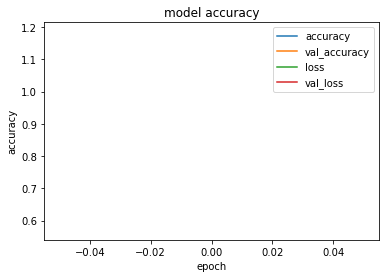

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [23]:
# model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
# model = kashgari.utils.load_model(model_path)
# model.evaluate(test_x, test_y)

In [24]:
test_df = test_df.merge(text_df, left_on='tweet_id', right_on='tweet_id')
test_df

,tweet_id,identification,text,token
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,"[I've, seen, two, separate, colours, of, the, ..."
1,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,"[No, serious, self, respecting, individual, be..."
2,0x2466f6,test,"Looking for a new car, and it says 1 lady owne...","[Looking, for, a, new, car, ,, and, it, says, ..."
3,0x23f9e9,test,@cineworld “only the brave” just out and fount...,"[“, only, the, brave, ”, just, out, and, fount..."
4,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...,"[Felt, like, total, dog, 💩, going, into, open,..."
...,...,...,...,...
411967,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...,"[6, year, old, walks, in, astounded, ., Mum, !..."
411968,0x31be7c,test,Only one week to go until the #inspiringvolunt...,"[Only, one, week, to, go, until, the, #inspiri..."
411969,0x1ca58e,test,"I just got caught up with the manga for ""My He...","[I, just, got, caught, up, with, the, manga, f..."
411970,0x35c8ba,test,Speak only when spoken to and make hot ass mus...,"[Speak, only, when, spoken, to, and, make, hot..."


In [31]:
text_list = test_df['token'].tolist()
text_list

[["I've",
  'seen',
  'two',
  'separate',
  'colours',
  'of',
  'the',
  'elegant',
  'furni',
  'on',
  'your',
  'homepage',
  '?',
  '<LH>'],
 ['No',
  'serious',
  'self',
  'respecting',
  'individual',
  'believes',
  'much',
  'less',
  'agrees',
  'w',
  'her',
  '<LH>'],
 ['Looking',
  'for',
  'a',
  'new',
  'car',
  ',',
  'and',
  'it',
  'says',
  '1',
  'lady',
  'owner',
  '.',
  'That',
  'means',
  'needs',
  'new',
  'clutch',
  ',',
  'gearbox',
  'and',
  'brakes',
  '.',
  '#womendrivers',
  '<LH>',
  'womendrivers'],
 ['“',
  'only',
  'the',
  'brave',
  '”',
  'just',
  'out',
  'and',
  'fountain',
  'park',
  'have',
  'only',
  '3',
  'showings',
  'per',
  'day',
  '!',
  '<LH>',
  '#robbingmembers',
  'robbingmembers'],
 ['Felt',
  'like',
  'total',
  'dog',
  '💩',
  'going',
  'into',
  'open',
  'gym',
  'and',
  'had',
  'a',
  'migraine',
  'Played',
  'through',
  'and',
  'sweated',
  'it',
  'out',
  'and',
  'my',
  'sweat',
  'has',
  'never',


In [32]:
predict_list = model.predict(text_list)
predict_list

2020-12-01 18:24:02,167 [DEBUG] kashgari - predict input shape (411972, 97) x: 
[[   2  238  485 ...    0    0    0]
 [   2  200 1777 ...    0    0    0]
 [   2  782   14 ...    0    0    0]
 ...
 [   2   10   40 ...    0    0    0]
 [   2 4163   74 ...    0    0    0]
 [   2 1849   62 ...    0    0    0]]
2020-12-01 18:25:31,079 [DEBUG] kashgari - predict output shape (411972, 8)
2020-12-01 18:25:31,266 [DEBUG] kashgari - predict output argmax: [0 3 0 ... 1 0 0]


['joy',
 'sadness',
 'joy',
 'disgust',
 'sadness',
 'joy',
 'joy',
 'anticipation',
 'anticipation',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'trust',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'joy',
 'disgust',
 'joy',
 'anger',
 'joy',
 'joy',
 'anticipation',
 'disgust',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'trust',
 'disgust',
 'joy',
 'anticipation',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'anticipation',
 'anticipation',
 'disgust',
 'joy',
 'disgust',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'disgust',
 'sadness',
 'disgust',
 'trust',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'anticipation',
 'disgust',
 'joy',
 'disgust',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'anticipation',
 'joy',
 'anticipation',
 'joy',
 'sadness',
 'sadne

In [33]:
test_df['predict'] = predict_list
test_df

,tweet_id,identification,text,token,predict
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,"[I've, seen, two, separate, colours, of, the, ...",joy
1,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,"[No, serious, self, respecting, individual, be...",sadness
2,0x2466f6,test,"Looking for a new car, and it says 1 lady owne...","[Looking, for, a, new, car, ,, and, it, says, ...",joy
3,0x23f9e9,test,@cineworld “only the brave” just out and fount...,"[“, only, the, brave, ”, just, out, and, fount...",disgust
4,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...,"[Felt, like, total, dog, 💩, going, into, open,...",sadness
...,...,...,...,...,...
411967,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...,"[6, year, old, walks, in, astounded, ., Mum, !...",joy
411968,0x31be7c,test,Only one week to go until the #inspiringvolunt...,"[Only, one, week, to, go, until, the, #inspiri...",anticipation
411969,0x1ca58e,test,"I just got caught up with the manga for ""My He...","[I, just, got, caught, up, with, the, manga, f...",anticipation
411970,0x35c8ba,test,Speak only when spoken to and make hot ass mus...,"[Speak, only, when, spoken, to, and, make, hot...",joy


In [34]:
output_df = test_df[['tweet_id', 'predict']]
output_df = output_df.rename(columns={'tweet_id':'id', 'predict':'emotion'})
# output_df

In [35]:
output_path = 'output/{}_epoch_{}.csv'.format(model_name, epochs)
output_df.to_csv(output_path, index=False, header=True)